# Oasis Infobyte Data Science Internship
Task 5   

SALES PREDICTION USING PYTHON    

HRITIK NEGI

In [1]:
#importing basic libraries

import numpy as np
import pandas as pd

In [2]:
#reading the dataset

data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# processing the data

data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#we don't need the 1st column so let's drop that

data=data.iloc[:,1:]

In [8]:
data.tail()

,Radio,Newspaper,Sales
195,3.7,13.8,7.6
196,4.9,8.1,9.7
197,9.3,6.4,12.8
198,42.0,66.2,25.5
199,8.6,8.7,13.4


In [9]:
#check for null values

data.isna().sum()

Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
data.describe()

,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000
mean,23.264000,30.554000,14.022500
std,14.846809,21.778621,5.217457
min,0.000000,0.300000,1.600000
25%,9.975000,12.750000,10.375000
50%,22.900000,25.750000,12.900000
75%,36.525000,45.100000,17.400000
max,49.600000,114.000000,27.000000


In [11]:
#Data Visulaization

import matplotlib.pyplot as plt
import seaborn as sns

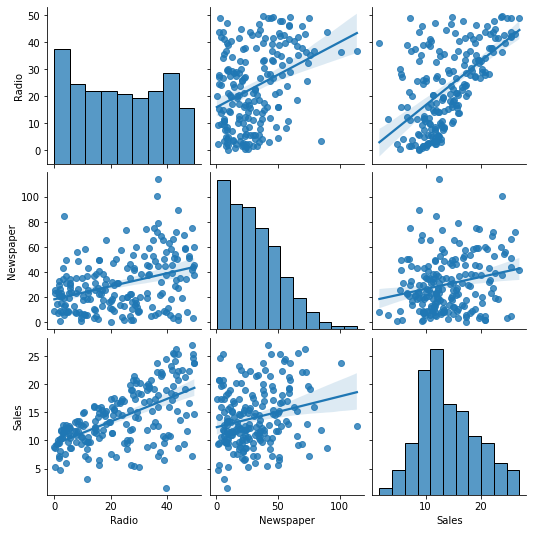

In [12]:
sns.pairplot(data,kind="reg");

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

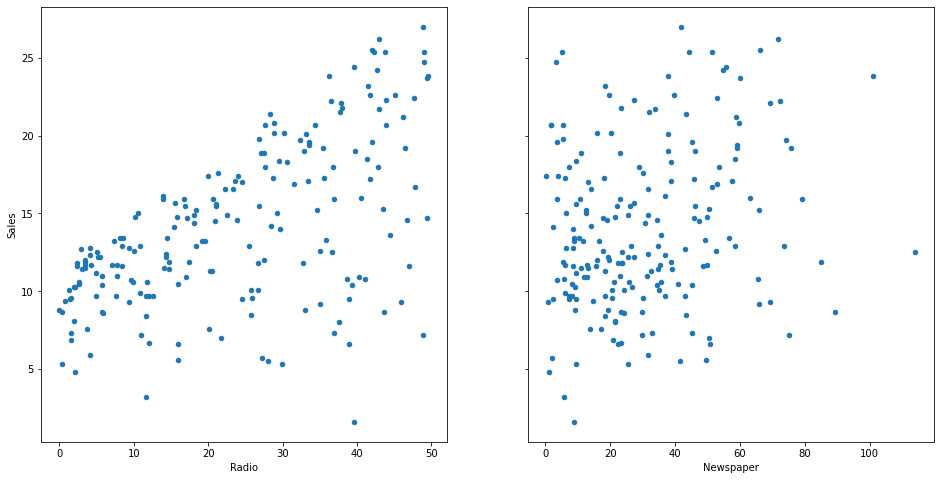

In [33]:
fig,axs= plt.subplots(1,2,sharey=True)

data.plot(kind="scatter",x='Radio',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[1],figsize=(16,8))

In [34]:
#rmoving the outlier from newspaper

data=data[data['Newspaper']<=90]
data.shape

(198, 3)

In [35]:
data.corr()

,Radio,Newspaper,Sales
Radio,1.000000,0.346364,0.576748
Newspaper,0.346364,1.000000,0.219555
Sales,0.576748,0.219555,1.000000


In [36]:
# Separating input and output data

x=data.drop(columns=['Sales'])
y=data['Sales']

In [37]:
x.head()

,Radio,Newspaper
0,37.8,69.2
1,39.3,45.1
2,45.9,69.3
3,41.3,58.5
4,10.8,58.4


In [38]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
x_train.tail()

,Radio,Newspaper
114,46.8,34.5
35,4.1,8.5
197,9.3,6.4
130,39.6,8.7
196,4.9,8.1


In [41]:
y_test.tail()

118    15.9
74     17.0
17     24.4
173    11.7
94     11.5
Name: Sales, dtype: float64

In [42]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [43]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [44]:
#Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.08248132697165378

In [46]:
#Let's Check predict function working Good or Not

pipe.predict([[42.0,66.2]]) #Original ans 25.5

array([22.33])

In [48]:
pipe.predict([[17.4,38.6]]) #Original ans 11.9

array([12.18])

In [49]:
import pickle
pickle.dump(pipe,open('sales.pkl','wb'))

In [50]:
p

NameError: name 'p' is not defined